# **Machine Specs**

In [ ]:
# specs
!df -h
!free -h --si | awk  '/Mem:/{print $2}'
!lscpu |grep 'Model name'
!nvidia-smi

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   42G   66G  39% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  821M  59% /sbin/docker-init
tmpfs           6.4G   36K  6.4G   1% /var/colab
/dev/sda1        81G   46G   36G  57% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
13G
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# **Imports and Loads**



In [ ]:
import pandas as pd
import numpy as np
import torch
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split    # train test split dataset
from sklearn.tree import DecisionTreeClassifier         # Decision tree classifier
from sklearn.tree import export_text                    # Print decision tree
from sklearn.metrics import confusion_matrix            # Confusion matrix
import matplotlib.pyplot as plt                         # plot accuracy

# load object
obj = pd.read_csv("train_dataset.csv")
val_test_obj = pd.read_csv("val_test_dataset.csv")


# **Accuracy Precision Recall F1-score** 


In [ ]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
def calc_metrics(preds,target):

  accuracy = accuracy_score(target,preds)
  precision = precision_score(target,preds,average = "binary")
  recall = recall_score(target,preds,average = "binary")
  f1 = f1_score(target,preds,average = "binary")
  
  return [accuracy,precision,recall,f1]



# **Binnary Tree**
### **Accuracy 60~70%  Precision Recall F1**

Binnary Tree
Accuracy 60~70% Precision Recall F1

### EXTRA TREES 
- **ACCURACY PRECISION RECALL F1**<br>
  - Metrics Normal [0.68, 0.69, 0.67, 0.68]<br>
  - Metrics Concat [0.69, 0.72, 0.70, 0.71]<br>

###  DECISION TREES
- **ACCURACY PRECISION RECALL F1**<br>
  - Metrics Normal [0.67, 0.68, 0.62, 0.65]<br>
  - Metrics Concat [0.65, 0.68, 0.66, 0.67]<br>

## **Best Scores: Extra Tree Classifier**
 - Accuracy:  0.69 <br>
 - Precision: 0.72 <br>
 - Recall:    0.70 <br>
 - F1-Score:  0.71


In [ ]:
# drop NaN's
X = obj.replace([np.inf, -np.inf], np.nan).dropna()

# getting target and X
T = X["Saved"]
X = X.drop("Saved",axis = 1)
X = X.drop("ResponseID",axis = 1)

# getting train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,T,test_size = 0.3)

In [ ]:
X = obj.replace([np.inf, -np.inf], np.nan).dropna()
X = X.drop("ResponseID",axis = 1)
X_left, X_right = X.iloc[::2, :],X.iloc[1::2, :]  # X split into 2 x's

# pop and remove saved and unnnamed  from x_left
T_left = X_left["Saved"].tolist()
X_left = X_left.drop("Saved",axis = 1)

# pop and remove saved  and unnamed from x_right
T_right = X_right["Saved"].tolist()
X_right = X_right.drop("Saved",axis = 1)

# combine Target for corresponding 2 images
T_combined = [ 0 if [T_left[i],T_right[i]] == [0,1] else 1 for i in range(len(T_left)) ]

# data
Y_train = np.array(T_combined)
X_right = X_right.to_numpy()
X_left = X_left.to_numpy()

X = np.concatenate((X_left,X_right),axis=1)

# getting train and test sets
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,T_combined,test_size = 0.3)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# create model
cf = ExtraTreesClassifier()
cf2 = ExtraTreesClassifier()

df = DecisionTreeClassifier()
df2 = DecisionTreeClassifier()

#fit extra trees
cf.fit(X_train,y_train)
cf2.fit(X_train1,y_train1)

# fit decision trees
df.fit(X_train,y_train)
df2.fit(X_train1,y_train1)


# results
results = cf.predict(X_test)
results2 = cf2.predict(X_test1)

metrics = calc_metrics(results,y_test)
metrics2 = calc_metrics(results2,y_test1)

print("- -  EXTRA TREES - - ")
print("ACCURACY PRECISION RECALL F1")
print("Metrics Normal",metrics)
print("Metrics Concat",metrics2)

# results decision trees
results = df.predict(X_test)
results2 = df2.predict(X_test1)

metrics = calc_metrics(results,y_test)
metrics2 = calc_metrics(results2,y_test1)
print("\n- -  DECISION TREES - - ")
print("ACCURACY PRECISION RECALL F1")
print("Metrics Normal",metrics)
print("Metrics Concat",metrics2)

- -  EXTRA TREES - - 
ACCURACY PRECISION RECALL F1
Metrics Normal [0.6810693808760595, 0.6846621991247265, 0.6651939941536008, 0.6747877072381723]
Metrics Concat [0.6924424176332573, 0.7175045503043996, 0.7040275896046311, 0.710702185197849]

- -  DECISION TREES - - 
ACCURACY PRECISION RECALL F1
Metrics Normal [0.665570628376927, 0.6782693558880937, 0.6233390911506776, 0.6496451445386879]
Metrics Concat [0.6500776577112455, 0.6798242821671866, 0.6575932996674467, 0.6685240256691188]


### Binary tree (same dataset)

#### Dataset

In [ ]:
# drop NaN's
X = obj.replace([np.inf, -np.inf], np.nan).dropna()

# training set
T = X["Saved"]
X_train = X.drop("Saved",axis = 1)
X_train = X_train.drop("ResponseID",axis = 1)

# test set
df_size = int(len(val_test_obj)/2)+1
test_obj = val_test_obj.iloc[0:df_size,:]
X_test = test_obj.replace([np.inf, -np.inf], np.nan).dropna()
y_test = X_test["Saved"]
X_test = X_test.drop("Saved",axis = 1)
X_test = X_test.drop("ResponseID",axis = 1)


#### Training

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# create model
cf = ExtraTreesClassifier()
df = DecisionTreeClassifier()


#fit extra trees
cf.fit(X_train,T)
# fit decision trees
df.fit(X_train,T)

# results ExtraTreesClassifier
results = cf.predict(X_train)
metrics = calc_metrics(results,T)

print("- - TRAINING EXTRA TREES - - ")
print("ACCURACY PRECISION RECALL F1")
print(metrics)

# results decision trees
results = df.predict(X_train)
metrics = calc_metrics(results,T)

print("\n- - TRAINING DECISION TREES - - ")
print("ACCURACY PRECISION RECALL F1")
print(metrics)


- - TRAINING EXTRA TREES - - 
ACCURACY PRECISION RECALL F1
[0.7493091586255625, 0.7699874526231151, 0.7110142419606422, 0.7393266961789666]

- - TRAINING DECISION TREES - - 
ACCURACY PRECISION RECALL F1
[0.7493091586255625, 0.7699874526231151, 0.7110142419606422, 0.7393266961789666]


### Binary tree (same dataset) concatenated

#### Dataset

In [ ]:
# training set
X = obj.replace([np.inf, -np.inf], np.nan).dropna()
X = X.drop("ResponseID",axis = 1)
X_left, X_right = X.iloc[::2, :],X.iloc[1::2, :]  # X split into 2 x's

# pop and remove saved and unnnamed  from x_left
T_left = X_left["Saved"].tolist()
X_left = X_left.drop("Saved",axis = 1)

# pop and remove saved  and unnamed from x_right
T_right = X_right["Saved"].tolist()
X_right = X_right.drop("Saved",axis = 1)

# combine Target for corresponding 2 images
T_combined = [ 0 if [T_left[i],T_right[i]] == [0,1] else 1 for i in range(len(T_left)) ]

# data
y_train = np.array(T_combined)
X_right = X_right.to_numpy()
X_left = X_left.to_numpy()

X_train = np.concatenate((X_left,X_right),axis=1)


# test set

df_size = int(len(val_test_obj)/2)+1
test_obj = val_test_obj.iloc[0:df_size,:]

X_test = test_obj.replace([np.inf, -np.inf], np.nan).dropna()
X_test = X_test.drop("ResponseID",axis = 1)
X_test_left, X_test_right = X_test.iloc[::2, :],X_test.iloc[1::2, :]  # X split into 2 x's

# pop and remove saved and unnnamed  from x_left
T_test_left = X_test_left["Saved"].tolist()
X_test_left = X_test_left.drop("Saved",axis = 1)

# pop and remove saved  and unnamed from x_right
T_test_right = X_test_right["Saved"].tolist()
X_test_right = X_test_right.drop("Saved",axis = 1)

# combine Target for corresponding 2 images
T_test_combined = [ 0 if [T_test_left[i],T_test_right[i]] == [0,1] else 1 for i in range(len(T_test_left)) ]

# data
y_test = np.array(T_test_combined)
X_test_right = X_test_right.to_numpy()
X_test_left = X_test_left.to_numpy()

X_test = np.concatenate((X_test_left,X_test_right),axis=1)

#### Training

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# create model
#cf = ExtraTreesClassifier()
#df = DecisionTreeClassifier()


#fit extra trees
#cf.fit(X_train,y_train)

# fit decision trees
#df.fit(X_train,y_train)

# results ExtraTreesClassifier
results = cf.predict(X_train)
metrics = calc_metrics(results,y_train)

print("- -  TRAINING EXTRA TREES - - ")
print("ACCURACY PRECISION RECALL F1")
print(metrics)

# results decision trees
results = df.predict(X_train)
metrics = calc_metrics(results,y_train)

print("\n- - TRAINING DECISION TREES - - ")
print("ACCURACY PRECISION RECALL F1")
print(metrics)

- -  TRAINING EXTRA TREES - - 
ACCURACY PRECISION RECALL F1
[0.8402397511474105, 0.8588185983812227, 0.8420774950989376, 0.8503656594207776]

- - TRAINING DECISION TREES - - 
ACCURACY PRECISION RECALL F1
[0.8402397511474105, 0.8588185983812227, 0.8420774950989376, 0.8503656594207776]


#**Neural Network**

###**Accuracy 60~80%**
###**Accuracy Precision           Recall               F1Score BS = 50 bats = 5000 (Training)**
0.702176, 0.7782387819557833, 0.7004263820544107, 0.7372852051797749

###**Accuracy Precision           Recall               F1Score BS = 1024 bats = 5000 (Training)**
0.7055662109375, 0.7729913638590354, 0.707473181584666, 0.7387825141910745

In [ ]:
# network class
# 2 layers for input: each representing one scenario (image)
import torch
import torch.nn as nn

class Network(nn.Module):
    def __init__(self):
        # super
        super(Network,self).__init__()
                
        # inputs
        self.input1 = nn.Linear(23,16)
        self.input2 = nn.Linear(23,16)
        self.fc2 = nn.Linear(32,1)  

        # activation function
        self.act = nn.Sigmoid()

        # loss function
        self.loss_function = nn.MSELoss()

        # optimization
        self.optim = torch.optim.Adam(self.parameters())


    # forward pass
    def forward(self,input1,input2):
        x1 = self.act(self.input1(input1))
        x2 = self.act(self.input2(input2))
        # now we can reshape x1 and x2 to 2D and concat them
        combined = torch.cat((x1.view(x1.size(0), -1),
                              x2.view(x2.size(0), -1)), dim=1)
        
        out = self.act(self.fc2(combined))
        return out

## Training dataset


In [ ]:
# - clean data for 2 inputs -
# split obj into 2 inputs (left images and right images)
X = obj.replace([np.inf, -np.inf], np.nan).dropna()
X = X.drop("ResponseID",axis = 1)
X_left, X_right = X.iloc[::2, :],X.iloc[1::2, :]  # X split into 2 x's

# pop and remove saved from x_left
T_left = X_left["Saved"].tolist()
X_left = X_left.drop("Saved",axis = 1)

# pop and remove saved from x_right
T_right = X_right["Saved"].tolist()
X_right = X_right.drop("Saved",axis = 1)

# combine Target for corresponding 2 images
T_combined = [ 0 if [T_left[i],T_right[i]] == [0,1] else 1 for i in range(len(T_left)) ]

# data
Y_train = np.array(T_combined)
X_right = X_right.to_numpy()
X_left = X_left.to_numpy()

## Test and Validation datasets

In [ ]:
# dividing dataframe into 2 (1 for validation and 1 for testing)
df_size = int(len(val_test_obj)/2)+1
test_obj = val_test_obj.iloc[0:df_size,:]
val_obj = val_test_obj.iloc[df_size:,:]

# - - - - - VALIDATION DATASET - - - - - -
# - clean data for 2 inputs -
# split obj into 2 inputs (left images and right images)
X_val = val_obj.replace([np.inf, -np.inf], np.nan).dropna()
X_val = X_val.drop("ResponseID",axis = 1)
X_val_left, X_val_right = X_val.iloc[::2, :],X_val.iloc[1::2, :]  # X split into 2 x's

# pop and remove saved from x_left
T_val_left = X_val_left["Saved"].tolist()
X_val_left = X_val_left.drop("Saved",axis = 1)

# pop and remove saved from x_right
T_val_right = X_val_right["Saved"].tolist()
X_val_right = X_val_right.drop("Saved",axis = 1)

# combine Target for corresponding 2 images
T_val_combined = [ 0 if [T_val_left[i],T_val_right[i]] == [0,1] else 1 for i in range(len(T_val_left)) ]

# data
Y_val = np.array(T_val_combined)
X_val_right = X_val_right.to_numpy()
X_val_left = X_val_left.to_numpy()

# - - - - - TEST DATASET - - - - - -
# - clean data for 2 inputs -
# split obj into 2 inputs (left images and right images)
X_test = test_obj.replace([np.inf, -np.inf], np.nan).dropna()
X_test = X_test.drop("ResponseID",axis = 1)
X_test_left, X_test_right = X_test.iloc[::2, :],X_test.iloc[1::2, :]  # X split into 2 x's

# pop and remove saved from x_left
T_test_left = X_test_left["Saved"].tolist()
X_test_left = X_test_left.drop("Saved",axis = 1)

# pop and remove saved from x_right
T_test_right = X_test_right["Saved"].tolist()
X_test_right = X_test_right.drop("Saved",axis = 1)

# combine Target for corresponding 2 images
T_test_combined = [ 0 if [T_test_left[i],T_test_right[i]] == [0,1] else 1 for i in range(len(T_test_left)) ]

# data
Y_test = np.array(T_test_combined)
X_test_right = X_test_right.to_numpy()
X_test_left = X_test_left.to_numpy()



## Training in batches

In [ ]:
from tqdm import trange

# DEFINE
# [0,1] -> 0
# [1,0] -> 1

# training 
model = Network()
x1 = torch.tensor(X_left[0:10].reshape((-1,23))).float()
x2 = torch.tensor(X_right[0:10].reshape((-1,23))).float()

# arrays to plot graph
losses = []
accuracies = []
validations = []
preds = []
target = []
BS = 64

# validation set inputs and targets
val_x_right = torch.tensor(X_val_right.reshape((-1,23))).float()
val_x_left = torch.tensor(X_val_left.reshape((-1,23))).float()
val_Y = torch.tensor(Y_val)

# optimization
optim = torch.optim.Adam(model.parameters())
dataset_length = X_right.shape[0]

val_freq = 50
epochs = 13
t = trange(epochs)

for epoch in t:
  for i in range(dataset_length//BS):
      # get sample from x_train
      # samp = np.random.randint(0,X_right.shape[0],size=(BS))
      samp = range(i*BS ,i*BS+BS)
      
      x_right = torch.tensor(X_right[samp].reshape((-1,23))).float()
      x_left = torch.tensor(X_left[samp].reshape((-1,23))).float()
      Y = torch.tensor(Y_train[samp].reshape((BS,-1)))

      

      # zero the gradients before running the backward pass
      optim.zero_grad()

      # get predicted y
      out = model(x_left,x_right)
      
      out_rounded = torch.round(out)
      
      #calc metrics
      preds = preds + (np.squeeze(out_rounded.detach().numpy()).tolist())
      
      target = target +  (np.squeeze(Y.detach().numpy()).tolist())
      
        
      # compute loss and accuracy
      accuracy = (Y == out_rounded).float().mean()
      #accuracy = sum(1 for x,y in zip(cats,ys) if x == y) / len(cats)
      
      Y = Y.float()
      
      loss = model.loss_function(out,Y)
      
      # backward pass
      loss.backward()

      # optimization
      optim.step()

      # plot arrays
      loss , accuracy  = loss.item(), accuracy
      accuracies.append(accuracy)
      losses.append(loss)

      # validation every 50 iterations
      if(i%val_freq==0):
        val_out = model(val_x_left,val_x_right)
        val_Y = val_Y.float()
        val_loss = model.loss_function(val_out.squeeze(),val_Y)
        loss_validation =  val_loss.item()
        validations.append(loss_validation)

  # trange descriptor
  t.set_description("epochs %d" % epochs)

epochs 13: 100%|██████████| 13/13 [46:16<00:00, 213.54s/it]


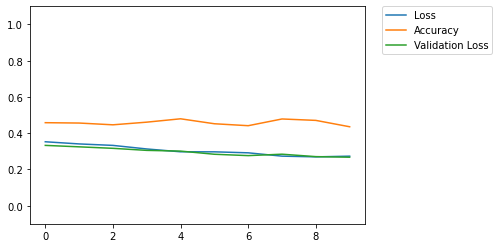

[0.45791015625, 0.002157497303128371, 0.9230769230769231, 0.004304932735426008]


In [ ]:
from matplotlib import pyplot as plt
# show accuracy and loss plot
plt.ylim(-0.1,1.1)
plt.plot(losses,label="Loss")
plt.plot(accuracies,label="Accuracy")
plt.plot(validations,label="Validation Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

 
metrics = calc_metrics(target,preds)

print(metrics)

## Training simple

In [ ]:
from tqdm.auto import trange

# DEFINE
# [0,1] -> 0
# [1,0] -> 1

# training 
model = Network2()

# training plot metrics
acc_plot = []
loss_plot = []
loss_val_plot = []


# arrays to plot graph
validations = []
preds = []
target = []

# optimization
optim = torch.optim.Adam(model.parameters())

# training params
dataset_length = X_right.shape[0]
epochs = 4
t = trange(4)

t1 = trange(1000)

for epoch in t:
  # reset losses and accuracies after each epoch
  losses = []
  accuracies = []
  # train 1 iteration of the entire dataset
  for i in t1:
    x_right = torch.tensor(X_right[i].reshape((-1,23))).float()
    x_left = torch.tensor(X_left[i].reshape((-1,23))).float()
    Y = torch.tensor(Y_train[i])

    # zero the gradients before running the backward pass
    optim.zero_grad()

    # get predicted y
    out = model(x_left,x_right)
    out_rounded = torch.round(out)
            
    # compute loss and accuracy
    accuracy = (Y == out_rounded).float().mean()
    Y = Y.float()
    out = out.squeeze().squeeze()
    loss = model.loss_function(out,Y)
    
    # backward pass
    loss.backward()
    # optimization
    optim.step()

    # plot arrays
    loss , accuracy = loss.item(), accuracy
    accuracies.append(accuracy)
    losses.append(loss)

    # plot metrics 
    acc_plot.append(accuracy)
    loss_plot.append(loss)

  # validation
  out_val = model(torch.tensor(X_val_left).float(),torch.tensor(X_val_right).float())
  out_val_rounded = torch.round(out_val)
  out_val_rounded = out_val_rounded.clone().detach().numpy()
  val_metrics = calc_metrics(out_val_rounded,Y_val)

  # plot metrics
  Y_val2 = torch.tensor(Y_val).float();
  out_val = out_val.squeeze()

  val_loss = model.loss_function(out_val,Y_val2)
  loss_val_plot.append(val_loss.item())

  # print("\n- - Epoch %d - -\nloss %.2f accuracy %.2f validation accuracy %.2f" % (epoch, np.mean(losses), np.mean(accuracies),val_metrics[0]))
  # trange descriptor
  t.set_description("loss %.2f accuracy %.2f validation accuracy %.2f" % (np.mean(losses), np.mean(accuracies),val_metrics[0]))



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

## Save model

In [ ]:
# save model 
print(model)
torch.save(model.state_dict(), "./network2_32_simple")

Network2(
  (input1): Linear(in_features=23, out_features=16, bias=True)
  (input2): Linear(in_features=23, out_features=16, bias=True)
  (middle1): Linear(in_features=32, out_features=24, bias=True)
  (middle2): Linear(in_features=24, out_features=8, bias=True)
  (last): Linear(in_features=8, out_features=1, bias=True)
  (act): Sigmoid()
  (loss_function): MSELoss()
)


In [ ]:
# load model
model = Network()
model.load_state_dict(torch.load("./network32_simple"))
model.eval()

## Testing

In [ ]:
# testing

preds = model(torch.tensor(X_test_left).float(),torch.tensor(X_test_right).float())
preds_rounded = torch.round(preds)
preds_rounded = preds_rounded.clone().detach().numpy()
test_metrics = calc_metrics(preds_rounded,Y_test)
print(test_metrics)

[0.7279216401633819, 0.7435128297795446, 0.7564159129347746, 0.7499088722023767]


#**Random Forest**

In [ ]:
# training set
X = obj.replace([np.inf, -np.inf], np.nan).dropna()
X = X.drop("ResponseID",axis = 1)
X_left, X_right = X.iloc[::2, :],X.iloc[1::2, :]  # X split into 2 x's

# pop and remove saved and unnnamed  from x_left
T_left = X_left["Saved"].tolist()
X_left = X_left.drop("Saved",axis = 1)

# pop and remove saved  and unnamed from x_right
T_right = X_right["Saved"].tolist()
X_right = X_right.drop("Saved",axis = 1)

# combine Target for corresponding 2 images
T_combined = [ 0 if [T_left[i],T_right[i]] == [0,1] else 1 for i in range(len(T_left)) ]

# data
y_train = np.array(T_combined)
X_right = X_right.to_numpy()
X_left = X_left.to_numpy()

X_train = np.concatenate((X_left,X_right),axis=1)

# test set

df_size = int(len(val_test_obj)/2)+1
test_obj = val_test_obj.iloc[0:df_size,:]

X_test = test_obj.replace([np.inf, -np.inf], np.nan).dropna()
X_test = X_test.drop("ResponseID",axis = 1)
X_test_left, X_test_right = X_test.iloc[::2, :],X_test.iloc[1::2, :]  # X split into 2 x's

# pop and remove saved and unnnamed  from x_left
T_test_left = X_test_left["Saved"].tolist()
X_test_left = X_test_left.drop("Saved",axis = 1)

# pop and remove saved  and unnamed from x_right
T_test_right = X_test_right["Saved"].tolist()
X_test_right = X_test_right.drop("Saved",axis = 1)

# combine Target for corresponding 2 images
T_test_combined = [ 0 if [T_test_left[i],T_test_right[i]] == [0,1] else 1 for i in range(len(T_test_left)) ]

# data
y_test = np.array(T_test_combined)
X_test_right = X_test_right.to_numpy()
X_test_left = X_test_left.to_numpy()

X_test = np.concatenate((X_test_left,X_test_right),axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,T)

RandomForestClassifier()

In [ ]:
# y_pred = rf.predict(X_train)

metrics = calc_metrics(y_pred,T)
print(metrics)

[0.749292692200603, 0.7639692875393892, 0.7214928760257834, 0.7421237807084401]


In [ ]:
from sklearn.metrics import roc_curve , auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc
#accuracy do modelo

0.6812816525872403

In [ ]:
n_estimators = [1,2,4,8,16,32,64,100,200]
train_results = []
test_results = []
 
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator,n_jobs=-1)
    rf.fit(X_train,y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate,true_positive_rate,thresjolds = roc_curve(y_train,train_pred)
    roc_uc = auc(false_positive_rate,true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate,thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    test_results.append(roc_auc)

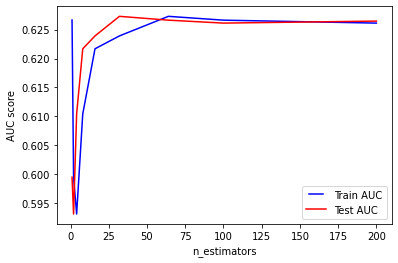

In [ ]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators,train_results , "b", label = "Train AUC")
line2, = plt.plot(n_estimators, test_results,"r",label = "Test AUC" )
plt.legend(handler_map = {line1:HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

# **K-Fold cross validation**


## **Network**


In [ ]:
# network class
# 2 layers for input: each representing one scenario (image)
import torch
import torch.nn as nn

class Network(nn.Module):
    def __init__(self):
        # super
        super(Network,self).__init__()
        
        # layers (verificar numeros: isto é do mnist)
        #self.layer1 = nn.Linear(784,128)
        #self.layer2 = nn.Linear(128,10)
        
        # inputs
        self.input1 = nn.Linear(23,16)
        self.input2 = nn.Linear(23,16)
        self.fc2 = nn.Linear(32,1)  

        # activation function
        self.act = nn.Sigmoid()
        #self.act2 = nn.Binnary()

        # loss function
        self.loss_function = nn.MSELoss()

        # optimization
        self.optim = torch.optim.Adam(self.parameters())


    # forward pass
    def forward(self,input1,input2):
        x1 = self.act(self.input1(input1))
        x2 = self.act(self.input2(input2))
        # now we can reshape `c` and `f` to 2D and concat them
        combined = torch.cat((x1.view(x1.size(0), -1),
                              x2.view(x2.size(0), -1)), dim=1)
        
        out = self.fc2(combined)
        return out

## **Data**

In [ ]:
import gc

# - clean data for 2 inputs -
# split obj into 2 inputs (left images and right images)
X = obj.replace([np.inf, -np.inf], np.nan).dropna()
X = X.drop("ResponseID",axis = 1)
X_left, X_right = X.iloc[::2, :],X.iloc[1::2, :]  # X split into 2 x's

# pop and remove saved from x_left
T_left = X_left["Saved"].tolist()
X_left = X_left.drop("Saved",axis = 1)

# pop and remove saved from x_right
T_right = X_right["Saved"].tolist()
X_right = X_right.drop("Saved",axis = 1)

# combine Target for corresponding 2 images
T_combined = [ 0 if [T_left[i],T_right[i]] == [0,1] else 1 for i in range(len(T_left)) ]

# data


Y = np.array(T_combined)
X_right = X_right.to_numpy()
X_left = X_left.to_numpy()

# clean
del X
del T_combined
del T_right
del T_left
del obj
gc.collect()

1081

In [ ]:
from sklearn.model_selection import RepeatedKFold
import gc
from sklearn.metrics import accuracy_score
# new model
model = Network2()

# repeated k-fold
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# fit model
def fit(model,x_left,x_right,y,fold):
    print("Fitting fold ",fold)
    # zero the gradients before running the backward pass.
    model.optim.zero_grad()

    # get predicted out
    out = model(x_left,x_right).float()

    Y = y.float()
    Y = Y.unsqueeze(-1)
    loss = model.loss_function(out,Y)

    # backward pass
    loss.backward()

    # optimization
    model.optim.step()
    return out
    


# training with k-cross validation
def train(network, save_Model = False):
    fold = 0
    train_accs = []
    test_accs = []
    for train_index,test_index in rkf.split(X_left):
      fold += 1

      # getting train and test sets
      X_train_right, X_train_left = torch.Tensor(X_right[train_index]) ,torch.Tensor(X_left[train_index])
      X_test_right, X_test_left = torch.Tensor(X_right[test_index]),torch.Tensor(X_left[test_index])
      Y_train2,Y_test2  = torch.Tensor(Y_train[train_index]),torch.Tensor(Y_train[test_index])

      # training
      preds = fit(network,X_train_left,X_train_right,Y_train,fold)
      # clean
      del X_train_right 
      del X_train_left
      gc.collect()

      # train accuraccy
      preds = torch.round(preds).detach().numpy()
      acc = accuracy_score(Y[train_index],preds)
      train_accs.append(acc)
      # clean
      del Y_train
      del preds
      gc.collect()
    
      # testing
      preds = network(X_test_left,X_test_right)
      #clean
      del X_test_right 
      del X_test_left
      gc.collect()

      # test accuraccy
      preds = torch.round(preds).detach().numpy()
      acc = accuracy_score(Y[test_index],preds)
      test_accs.append(acc)
      #clean
      del Y_test
      del preds
      gc.collect()

    print('Training Accuraccy : {}'.format(train_accs))
    print('Testing Accuraccy : {}'.format(test_accs))

train(model)

# Neural Network 2

In [ ]:
# network class
# 2 layers for input: each representing one scenario (image)
import torch
import torch.nn as nn

class Network2(nn.Module):
    def __init__(self):
        # super
        super(Network2,self).__init__()
                
        # inputs
        self.input1 = nn.Linear(23,16)
        self.input2 = nn.Linear(23,16)

        self.middle1 = nn.Linear(32,24)
        self.middle2 = nn.Linear(24,8)
        
        self.last = nn.Linear(8,1)  

        # activation function
        self.act = nn.Sigmoid()

        # loss function
        self.loss_function = nn.MSELoss()

        # optimization
        self.optim = torch.optim.Adam(self.parameters())


    # forward pass
    def forward(self,input1,input2):
        x1 = self.act(self.input1(input1))
        x2 = self.act(self.input2(input2))
        # now we can reshape x1 and x2 to 2D and concat them
        combined = torch.cat((x1.view(x1.size(0), -1),
                              x2.view(x2.size(0), -1)), dim=1)
        
        x = self.act(self.middle1(combined))
        x = self.act(self.middle2(x))
        out = self.act(self.last(x))
        return out

# PLOT METRICS (accuracy,loss,val_loss,net)

In [ ]:
def plot_metrics(accuracy,loss,val_loss,net):
 
  
  plt.ylim(-0.1,1.1)
  plt.plot(loss,label="Loss",zorder=1)

  plt.scatter(range(0,len(loss)+400,50),val_loss,label="Validation Loss",zorder=5,color="#59d6ff",s=0.5)
  plt.plot(accuracy,label="Accuracy")
  plt.title(net)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

  # epochs lines
  length = len(loss)
  epoch_size = length/epochs;
  for i in range(epochs):
    plt.axvline(x=epoch_size*i,linestyle = "--",linewidth=0.5,color="#121212")
  plt.show()



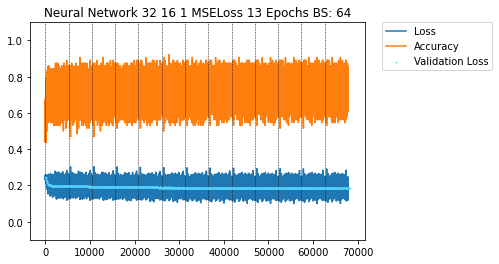

In [ ]:
plot_metrics(accuracies,losses,validations,"Neural Network 32 16 1 MSELoss 13 Epochs BS: 64")

In [ ]:
# load model
model = Network2()
model.load_state_dict(torch.load("./network2_32_simple"))
model.eval()
X_test_left = torch.tensor(X_test_left.reshape((-1,23))).float()
X_test_right = torch.tensor(X_test_right.reshape((-1,23))).float()
test_Y = torch.tensor(Y_test)

out = model(X_test_left,X_test_right)

out = torch.round(out)
out = out.clone().detach().numpy()
metrics = calc_metrics(out,Y_test)
print(metrics)
print(model)

[0.7181068326922314, 0.783961149757186, 0.6588352084712111, 0.7159724303266408]
Network2(
  (input1): Linear(in_features=23, out_features=16, bias=True)
  (input2): Linear(in_features=23, out_features=16, bias=True)
  (middle1): Linear(in_features=32, out_features=24, bias=True)
  (middle2): Linear(in_features=24, out_features=8, bias=True)
  (last): Linear(in_features=8, out_features=1, bias=True)
  (act): Sigmoid()
  (loss_function): MSELoss()
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [ ]:
# check weights
model = Network2()
model.load_state_dict(torch.load("./network2_32_simple"))
model.eval()

print(model.input1.weight)
print(model.input2.weight)
